### Case Study 5

In [ ]:
#importing the necessary libraries

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.graph_objects as go

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.svm import SVC
from sklearn.ensemble import BaggingClassifier
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [ ]:
#loading the data
data = pd.read_csv("Company B - Data.csv")

In [ ]:
#looking the dataset
data.head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,LA,117,408,No,No,0,184.5,97,31.37,351.6,80,29.89,215.8,90,9.71,8.7,4,2.35,1,False
1,IN,65,415,No,No,0,129.1,137,21.95,228.5,83,19.42,208.8,111,9.40,12.7,6,3.43,4,True
2,NY,161,415,No,No,0,332.9,67,56.59,317.8,97,27.01,160.6,128,7.23,5.4,9,1.46,4,True
3,SC,111,415,No,No,0,110.4,103,18.77,137.3,102,11.67,189.6,105,8.53,7.7,6,2.08,2,False
4,HI,49,510,No,No,0,119.3,117,20.28,215.1,109,18.28,178.7,90,8.04,11.1,1,3.00,1,False


In [ ]:
#overview of the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   State                   3333 non-null   object 
 1   Account length          3333 non-null   int64  
 2   Area code               3333 non-null   int64  
 3   International plan      3333 non-null   object 
 4   Voice mail plan         3333 non-null   object 
 5   Number vmail messages   3333 non-null   int64  
 6   Total day minutes       3333 non-null   float64
 7   Total day calls         3333 non-null   int64  
 8   Total day charge        3333 non-null   float64
 9   Total eve minutes       3333 non-null   float64
 10  Total eve calls         3333 non-null   int64  
 11  Total eve charge        3333 non-null   float64
 12  Total night minutes     3333 non-null   float64
 13  Total night calls       3333 non-null   int64  
 14  Total night charge      3333 non-null   

In [ ]:
#data.loc[data.Churn=='No','Churn'] = 0 
#data.loc[data.Churn=='Yes','Churn'] = 1

data['Churn']=data['Churn'].replace('Yes', 1).replace('No', 0)

In [ ]:
#summary of the numeric attributes
data.describe()

,Account length,Area code,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,101.064806,437.182418,8.099010,179.775098,100.435644,30.562307,200.980348,100.114311,17.083540,200.872037,100.107711,9.039325,10.237294,4.479448,2.764581,1.562856
std,39.822106,42.371290,13.688365,54.467389,20.069084,9.259435,50.713844,19.922625,4.310668,50.573847,19.568609,2.275873,2.791840,2.461214,0.753773,1.315491
min,1.000000,408.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.200000,33.000000,1.040000,0.000000,0.000000,0.000000,0.000000
25%,74.000000,408.000000,0.000000,143.700000,87.000000,24.430000,166.600000,87.000000,14.160000,167.000000,87.000000,7.520000,8.500000,3.000000,2.300000,1.000000
50%,101.000000,415.000000,0.000000,179.400000,101.000000,30.500000,201.400000,100.000000,17.120000,201.200000,100.000000,9.050000,10.300000,4.000000,2.780000,1.000000
75%,127.000000,510.000000,20.000000,216.400000,114.000000,36.790000,235.300000,114.000000,20.000000,235.300000,113.000000,10.590000,12.100000,6.000000,3.270000,2.000000
max,243.000000,510.000000,51.000000,350.800000,165.000000,59.640000,363.700000,170.000000,30.910000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000


**Breakdown for the churn rate**

In [ ]:
#cust service calls churn rate

custcall_plot = data.groupby('Customer service calls').Churn.mean().reset_index()
plot_data = [
    go.Bar(
        x=custcall_plot['Customer service calls'],
        y=custcall_plot['Churn'],
        width = [0.5, 0.5],
        marker=dict(
        color='darkseagreen')
    )
]
plot_layout = go.Layout(
        xaxis={"type": "category"},
        yaxis={"title": "Churn Rate"},
        title='Churn rate by Customer service calls',
        plot_bgcolor  = 'rgb(243,243,243)',
        paper_bgcolor  = 'rgb(243,243,243)',
    )
fig = go.Figure(data=plot_data, layout=plot_layout)
plt.savefig('custserv.png')
fig


<Figure size 432x288 with 0 Axes>

In [ ]:
data.groupby('Customer service calls').Churn.mean()

Customer service calls
0    0.131994
1    0.103302
2    0.114625
3    0.102564
4    0.457831
5    0.606061
6    0.636364
7    0.555556
8    0.500000
9    1.000000
Name: Churn, dtype: float64

In [ ]:
# voice mail churn rate

voice_plot = data.groupby('Voice mail plan').Churn.mean().reset_index()
plot_data = [
    go.Bar(
        x=voice_plot['Voice mail plan'],
        y=voice_plot['Churn'],
        width = [0.8, 0.8],
        marker=dict(
        color=['grey','darkseagreen']),
        
    )
]
plot_layout = go.Layout(
        xaxis={"type": "category"},
        yaxis={"title": "Churn Rate"},
        title='(b) Churn rate by Voice mail availability',
        plot_bgcolor  = 'rgb(243,243,243)',
        paper_bgcolor  = 'rgb(243,243,243)',
        width= 500,
      height= 500,
    )
fig = go.Figure(data=plot_data, layout=plot_layout)
plt.savefig('voice.png')
fig


<Figure size 432x288 with 0 Axes>

In [ ]:
# Churn rate per state

contract_plot = data.groupby('State').Churn.mean().reset_index()
plot_data = [
    go.Bar(
        x=contract_plot['State'],
        y=contract_plot['Churn'],
        width = [0.5, 0.5],
        marker=dict(
        color= 'darkseagreen')
    )
]
plot_layout = go.Layout(
        xaxis={"type": "category"},
        yaxis={"title": "Churn Rate"},
        title='Churn rate by state',
        plot_bgcolor  = 'rgb(243,243,243)',
        paper_bgcolor  = 'rgb(243,243,243)',
    )
fig = go.Figure(data=plot_data, layout=plot_layout)
plt.savefig('bystate.png')
fig

<Figure size 432x288 with 0 Axes>

In [ ]:
# Churn rate Area code

areacode_plot = data.groupby('Area code').Churn.mean().reset_index()
plot_data = [
    go.Bar(
        x=areacode_plot['Area code'],
        y=areacode_plot['Churn'],
        width = [0.5, 0.5],
        marker=dict(
        color='darkseagreen')
    )
]
plot_layout = go.Layout(
        xaxis={"type": "category"},
        yaxis={"title": "Churn Rate"},
        title='Churn rate by Area code',
        plot_bgcolor  = 'rgb(243,243,243)',
        paper_bgcolor  = 'rgb(243,243,243)',
    )
fig = go.Figure(data=plot_data, layout=plot_layout)
fig

In [ ]:
#International plan churn rate

intplan_plot = data.groupby('International plan').Churn.mean().reset_index()
plot_data = [
    go.Bar(
        x=intplan_plot['International plan'],
        y=intplan_plot['Churn'],
        width = [0.8, 0.8],
        marker=dict(
        color=['grey','darkseagreen'])
    )
]
plot_layout = go.Layout(
        xaxis={"type": "category"},
        yaxis={"title": "Churn Rate"},
        title='(a) Churn rate by International plan',
        plot_bgcolor  = 'rgb(243,243,243)',
        paper_bgcolor  = 'rgb(243,243,243)',
         width= 500,
      height= 500,
    )
fig = go.Figure(data=plot_data, layout=plot_layout)
plt.savefig('intplan.png')
fig

<Figure size 432x288 with 0 Axes>

**scatter plots**

In [ ]:
daycharge_plot = data.groupby('Total day charge').Churn.mean().reset_index()
plot_data = [
    go.Scatter(
        x=daycharge_plot['Total day charge'],
        y=daycharge_plot['Churn'],
        mode='markers',
        name='Low',
        marker= dict(size= 7,
            line= dict(width=1),
            color= 'green',
           ),
    )
]
plot_layout = go.Layout(
        yaxis= {'title': "Churn Rate"},
        xaxis= {'title': "Total day charge"},
        title='Total Day charge based Churn rate',
        plot_bgcolor  = "rgb(243,243,243)",
        paper_bgcolor  = "rgb(243,243,243)",
        width=800,
        height=500
    )
fig = go.Figure(data=plot_data, layout=plot_layout)
plt.savefig('daychargechurn.png')
fig

<Figure size 432x288 with 0 Axes>

In [ ]:
# apply the same for Monthly and Total Charges
data.head(3)

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,LA,117,408,No,No,0,184.5,97,31.37,351.6,80,29.89,215.8,90,9.71,8.7,4,2.35,1,False
1,IN,65,415,No,No,0,129.1,137,21.95,228.5,83,19.42,208.8,111,9.40,12.7,6,3.43,4,True
2,NY,161,415,No,No,0,332.9,67,56.59,317.8,97,27.01,160.6,128,7.23,5.4,9,1.46,4,True


In [ ]:
daymins_plot = data.groupby('Total day minutes').Churn.mean().reset_index()
plot_data = [
    go.Scatter(
        x=daymins_plot['Total day minutes'],
        y=daymins_plot['Churn'],
        mode='markers',
        name='Low',
        marker= dict(size= 7,
            line= dict(width=1),
            color= 'green',
           ),
    )
]
plot_layout = go.Layout(
        yaxis= {'title': "Churn Rate"},
        xaxis= {'title': "Total day minutes"},
        title='Total day minutes based Churn rate',
        plot_bgcolor  = "rgb(243,243,243)",
        paper_bgcolor  = "rgb(243,243,243)",
        width=600
    )
fig = go.Figure(data=plot_data, layout=plot_layout)
plt.savefig('dayminchurn.png')
fig

<Figure size 432x288 with 0 Axes>

**Figures for minutes, calls and charges**

In [ ]:
totals = {'Total day minutes':data['Total day minutes'],
           'Total night minutes':data['Total night minutes'],
           'Total eve minutes':data['Total eve minutes'],
           'Total intl minutes':data['Total intl minutes'],
          
           'Total day calls':data['Total day calls'],
           'Total night calls':data['Total night calls'],
           'Total eve calls':data['Total eve calls'],
           'Total intl calls':data['Total intl calls'],
          
           'Total day charge':data['Total day charge'],
           'Total night charge':data['Total night charge'],
           'Total eve charge':data['Total eve charge'],
           'Total intl charge':data['Total intl charge'],
          
          'Churn': data['Churn']}

data_totals = pd.DataFrame(totals,
                            columns=['Total day minutes','Total night minutes','Total eve minutes','Total intl minutes',
                                     'Total day calls','Total night calls','Total eve calls','Total intl calls',
                                     'Total day charge','Total night charge','Total eve charge','Total intl charge',
                                     'Churn'])

data_totals

,Total day minutes,Total night minutes,Total eve minutes,Total intl minutes,Total day calls,Total night calls,Total eve calls,Total intl calls,Total day charge,Total night charge,Total eve charge,Total intl charge,Churn
0,184.5,215.8,351.6,8.7,97,90,80,4,31.37,9.71,29.89,2.35,False
1,129.1,208.8,228.5,12.7,137,111,83,6,21.95,9.40,19.42,3.43,True
2,332.9,160.6,317.8,5.4,67,128,97,9,56.59,7.23,27.01,1.46,True
3,110.4,189.6,137.3,7.7,103,105,102,6,18.77,8.53,11.67,2.08,False
4,119.3,178.7,215.1,11.1,117,90,109,1,20.28,8.04,18.28,3.00,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3328,134.7,221.4,189.7,11.8,98,128,68,5,22.90,9.96,16.12,3.19,False
3329,156.2,279.1,215.5,9.9,77,83,126,6,26.55,12.56,18.32,2.67,False
3330,231.1,191.3,153.4,9.6,57,123,55,4,39.29,8.61,13.04,2.59,False
3331,180.8,191.9,288.8,14.1,109,91,58,6,30.74,8.64,24.55,3.81,False


In [ ]:
#diving the dataset for churn=true and churn=false

churn_true = data_totals.loc[data_totals['Churn']==True]
#print(churn_true)

churn_false = data_totals.loc[data_totals['Churn']==False]
#print(churn_true)

In [ ]:
churn_true

,Total day minutes,Total night minutes,Total eve minutes,Total intl minutes,Total day calls,Total night calls,Total eve calls,Total intl calls,Total day charge,Total night charge,Total eve charge,Total intl charge,Churn
1,129.1,208.8,228.5,12.7,137,111,83,6,21.95,9.40,19.42,3.43,True
2,332.9,160.6,317.8,5.4,67,128,97,9,56.59,7.23,27.01,1.46,True
7,159.1,143.2,231.3,8.8,114,91,117,3,27.05,6.44,19.66,2.38,True
14,203.4,196.0,190.9,8.9,100,119,104,4,34.58,8.82,16.23,2.40,True
16,251.8,275.2,205.7,9.8,72,109,126,7,42.81,12.38,17.48,2.65,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3298,172.1,150.0,223.6,13.9,119,94,133,20,29.26,6.75,19.01,3.75,True
3308,186.1,206.5,198.6,13.8,114,80,140,5,31.64,9.29,16.88,3.73,True
3323,140.0,120.1,196.4,9.7,101,133,77,4,23.80,5.40,16.69,2.62,True
3324,321.1,180.5,265.5,11.5,105,72,122,2,54.59,8.12,22.57,3.11,True


In [ ]:
################
#MINUTES-AVERAGE
################
#dataframe for total minutes and churn=true

minutes_true = pd.DataFrame(data = churn_true,
                            columns = ['Churn','Total day minutes', 'Total night minutes', 'Total eve minutes', 'Total intl minutes'])
#minutes_true

#taking the sum for each column
churn = 'True'
av_day_minutes_true = minutes_true['Total day minutes'].mean()
av_night_minutes_true = minutes_true['Total night minutes'].mean()
av_eve_minutes_true = minutes_true['Total eve minutes'].mean()
av_intl_minutes_true = minutes_true['Total intl minutes'].mean()


av_min_true = {
      'Churn': [churn],
      'Day': [av_day_minutes_true],
      'Night': [av_night_minutes_true],
      'Eve': [av_eve_minutes_true],
      'International': [av_intl_minutes_true]}

df_true = pd.DataFrame(av_min_true)
#######

# #dataframe for total minutes and churn=false

minutes_false = pd.DataFrame(data = churn_false,
                            columns = ['Churn','Total day minutes', 'Total night minutes', 'Total eve minutes', 'Total intl minutes'])
#minutes_false

#taking the sum for each column
churn = 'False'
av_day_minutes_false = minutes_false['Total day minutes'].mean()
av_night_minutes_false = minutes_false['Total night minutes'].mean()
av_eve_minutes_false = minutes_false['Total eve minutes'].mean()
av_intl_minutes_false = minutes_false['Total intl minutes'].mean()


av_min_false = {
      'Churn': [churn],
      'Day': [av_day_minutes_false],
      'Night': [av_night_minutes_false],
      'Eve': [av_eve_minutes_false],
      'International': [av_intl_minutes_false]}

df_false = pd.DataFrame(av_min_false)

minutes = [df_true, df_false]
minutes = pd.concat(minutes)
minutes = minutes.set_index('Churn')
minutes = minutes.T

minutes

Churn,True,False
Day,206.914079,175.175754
Night,205.231677,200.133193
Eve,212.410145,199.043298
International,10.700000,10.158877


In [ ]:
data_plot = {
    "true": [206.9, 205.2, 212.4, 10.7],
    "false": [175.2, 200.1, 199, 10.2],
    "labels": ['Day', 'Night','Eve','International']}

colors = {'False': 'grey',
          'True': 'darkseagreen'}

fig_minutes = go.Figure(
    data = [
            go.Bar(
                name = "False",
                x = data_plot["labels"],
                y = data_plot["false"],
                width = [0.4, 0.4],
                offsetgroup =0,
                marker_color = colors['False']
            ),
            go.Bar(
                name = "True",
                x = data_plot["labels"],
                y = data_plot["true"],
                width = [0.4, 0.4],
                offsetgroup =1,
                marker_color = colors['True']
            ),
    ],
    layout = go.Layout(
        title = "(a) Churn rate and Average number minutes",
        yaxis_title = "Average number of minutes",
        plot_bgcolor  = 'rgb(243,243,243)',
        paper_bgcolor  = 'rgb(243,243,243)',
        height=500,
        width =400
    )
)
plt.savefig('avmins.png')
fig_minutes.show()

<Figure size 432x288 with 0 Axes>

- highest bar for false: night
- highest bar for true: eve

- lowest bar for false: international
- lowest bar for true: international

In [ ]:
##############
#CALLS-AVERAGE
##############
#dataframe for total minutes and churn=true

calls_true = pd.DataFrame(data = churn_true,
                            columns = ['Churn','Total day calls', 'Total night calls', 'Total eve calls', 'Total intl calls'])
#calls_true

#taking the sum for each column
churn = 'True'
av_day_calls_true = calls_true['Total day calls'].mean()
av_night_calls_true = calls_true['Total night calls'].mean()
av_eve_calls_true = calls_true['Total eve calls'].mean()
av_intl_calls_true = calls_true['Total intl calls'].mean()


av_calls_true = {
      'Churn': [churn],
      'Day': [av_day_calls_true],
      'Night': [av_night_calls_true],
      'Eve': [av_eve_calls_true],
      'International': [av_intl_calls_true]}

df_true = pd.DataFrame(av_calls_true)
#######

# #dataframe for total minutes and churn=false

calls_false = pd.DataFrame(data = churn_false,
                            columns = ['Churn','Total day calls', 'Total night calls', 'Total eve calls', 'Total intl calls'])
#calls_false

#taking the sum for each column
churn = 'False'
av_day_calls_false = calls_false['Total day calls'].mean()
av_night_calls_false = calls_false['Total night calls'].mean()
av_eve_calls_false = calls_false['Total eve calls'].mean()
av_intl_calls_false = calls_false['Total intl calls'].mean()


av_calls_false = {
      'Churn': [churn],
      'Day': [av_day_calls_false],
      'Night': [av_night_calls_false],
      'Eve': [av_eve_calls_false],
      'International': [av_intl_calls_false]}

df_false = pd.DataFrame(av_calls_false)

calls = [df_true, df_false]
calls = pd.concat(calls)
calls = calls.set_index('Churn')

calls = calls.T
calls

Churn,True,False
Day,101.335404,100.283158
Night,100.399586,100.058246
Eve,100.561077,100.038596
International,4.163561,4.532982


In [ ]:
data_plot = {
    "true": [101, 100, 101, 4],
    "false": [100, 100, 100, 5],
    "labels": ['Day', 'Night','Eve','International']}

colors = {'False':'grey',
          'True':  'darkseagreen'}

fig_calls = go.Figure(
    data = [
            go.Bar(
                name = "False",
                x = data_plot["labels"],
                y = data_plot["false"],
                width = [0.4, 0.4],
                offsetgroup =0,
                marker_color = colors['False']
            ),
            go.Bar(
                name = "True",
                x = data_plot["labels"],
                y = data_plot["true"],
                width = [0.4, 0.4],
                offsetgroup =1,
                marker_color = colors['True']
            ),
    ],
    layout = go.Layout(
        title = "(b) Churn rate and Average number of calls",
        yaxis_title = "Average number of calls",
        plot_bgcolor  = 'rgb(243,243,243)',
        paper_bgcolor  = 'rgb(243,243,243)',
        height=500,
        width =400
    )
)
plt.savefig('avcalls.png')
fig_calls.show()

<Figure size 432x288 with 0 Axes>

- highest bar for false: night
- highest bar for true: day

- lowest bar for false: international
- lowest bar for true: international

In [ ]:
###############
#CHARGE-AVERAGE
###############
#dataframe for total charges and churn=true

charge_true = pd.DataFrame(data = churn_true,
                            columns = ['Churn','Total day charge', 'Total night charge', 'Total eve charge', 'Total intl charge'])
#charge_true

#taking the sum for each column
churn = 'True'
av_day_charge_true = charge_true['Total day charge'].mean()
av_night_charge_true = charge_true['Total night charge'].mean()
av_eve_charge_true = charge_true['Total eve charge'].mean()
av_intl_charge_true = charge_true['Total intl charge'].mean()


av_charge_true = {
      'Churn': [churn],
      
      'Day': [av_day_charge_true],
      'Night': [av_night_charge_true],
      'Eve': [av_eve_charge_true],
      'International': [av_intl_charge_true]}

df_true = pd.DataFrame(av_charge_true)
#######

# #dataframe for total charges and churn=false

charge_false = pd.DataFrame(data = churn_false,
                            columns = ['Churn','Total day charge', 'Total night charge', 'Total eve charge', 'Total intl charge'])
#charges_false

#taking the sum for each column
churn = 'False'
av_day_charge_false = charge_false['Total day charge'].mean()
av_night_charge_false = charge_false['Total night charge'].mean()
av_eve_charge_false = charge_false['Total eve charge'].mean()
av_intl_charge_false = charge_false['Total intl charge'].mean()


av_charge_false = {
      'Churn': [churn],
      'Day': [av_day_charge_false],
      'Night': [av_night_charge_false],
      'Eve': [av_eve_charge_false],
      'International': [av_intl_charge_false]}

df_false = pd.DataFrame(av_charge_false)

charge = [df_true, df_false]
charge = pd.concat(charge)
charge = charge.set_index('Churn')

charge = charge.T
charge

Churn,True,False
Day,35.175921,29.780421
Night,9.235528,9.006074
Eve,18.054969,16.918909
International,2.889545,2.743404


In [ ]:
data_plot = {
    "true": [35.18, 9.24, 18.06, 2.89],
    "false": [29.78, 9.01, 16.92, 2.74],
    "labels": ['Day', 'Night','Eve','International']}

colors = {'False':  'grey',
          'True': 'darkseagreen'}

fig_charge = go.Figure(
    data = [
            go.Bar(
                name = "False",
                x = data_plot["labels"],
                y = data_plot["false"],
                width = [0.4, 0.4],
                offsetgroup =0,
                marker_color = colors['False']
            ),
            go.Bar(
                name = "True",
                x = data_plot["labels"],
                y = data_plot["true"],
                width = [0.4, 0.4],
                offsetgroup =1,
                marker_color = colors['True']
            ),
    ],
    layout = go.Layout(
        title = "(c) Churn rate and Average call charges",
        yaxis_title = "Average number of charges",
        plot_bgcolor  = 'rgb(243,243,243)',
        paper_bgcolor  = 'rgb(243,243,243)',
          height=500,
        width =400

    )
)
plt.savefig('avcharge.png')
fig_charge.show()

<Figure size 432x288 with 0 Axes>

- highest bar for false: day
- highest bar for true: day

- lowest bar for false: international
- lowest bar for true: international

**Boxplots for minutes and calls**

In [ ]:
import plotly.express as px

for col in data_totals.loc[:,~data_totals.columns.isin(['Churn'])].columns:
    fig = px.box(data_totals,
                x='Churn',
                y=col,
                color='Churn')
    
    fig.update_layout(
        plot_bgcolor  = 'rgb(243,243,243)',
        paper_bgcolor  = 'rgb(243,243,243)'
        )
    
    #fig = go.Figure(data=fig, layout=plot_layout)
    
    fig.show()

**Visualisations**

In [ ]:
#churn_data = data['Churn'].value_counts().sort_index()
#churn_data 

d = {'T/F': [False, True],
     'Churn': [2850, 483]}

df_churn = pd.DataFrame(data = d)
df_churn

,T/F,Churn
0,False,2850
1,True,483


In [ ]:
#number of customers that are likely to churn

plot_churn = [
    go.Bar(
        x = df_churn['T/F'],
        y = df_churn['Churn'],
        width = [0.5, 0.5],
        marker=dict(
        color=['grey','darkseagreen'])
    )
]
plot_layout = go.Layout(
        xaxis={"type": "category"},
        yaxis={"title": "Number of customers"},
        title='Number of customers that are likely to churn',
        plot_bgcolor  = 'rgb(243,243,243)',
        paper_bgcolor  = 'rgb(243,243,243)',
         height=400,
        width =600
    )
fig = go.Figure(data=plot_churn, layout=plot_layout)
plt.savefig('churncount.png')
fig

#print(data.groupby(['Churn']).size())

<Figure size 432x288 with 0 Axes>

In [ ]:
churn_perc=(483/(2850+483))*100
churn_perc

14.491449144914492

14.5 % of customers will churn


**Visualisation of the correlation**

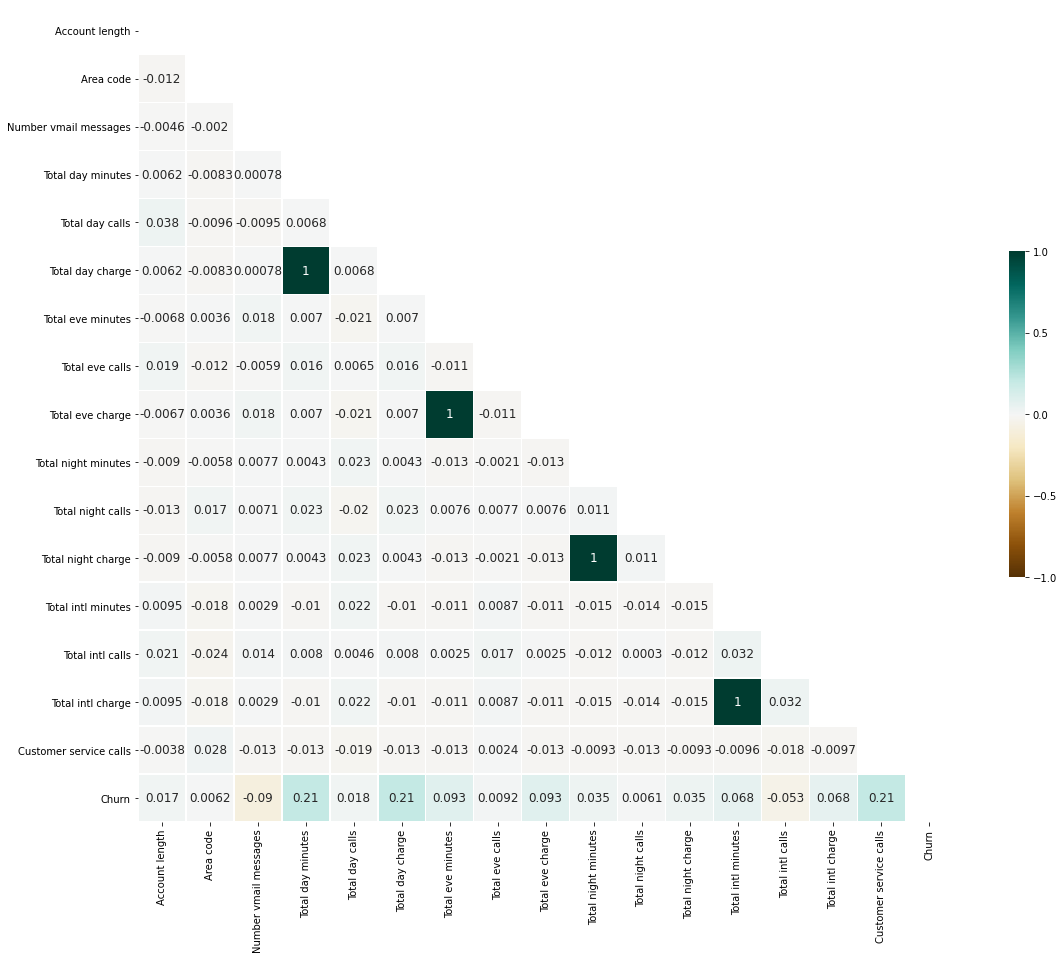

In [ ]:
def corr_heatmap(data):
    corr_matrix = data.corr()
    mask = np.zeros_like(corr_matrix, dtype=np.bool)
    mask[np.triu_indices_from(mask)]= True
    f, ax = plt.subplots(figsize=(20, 15)) 
    heatmap = sns.heatmap(corr_matrix, 
                          mask = mask,
                          square = True,
                          linewidths = .5,
                          cmap = 'BrBG',
                         
                          cbar_kws = {'shrink': .4, 
                                    'ticks' : [-1, -.5, 0, 0.5, 1]},
                          vmin = -1, 
                          vmax = 1,
                          annot = True,
                          annot_kws = {'size': 12})#add the column names as labels,
                          
                          
                          
    ax.set_yticklabels(corr_matrix.columns, rotation = 0)
    ax.set_xticklabels(corr_matrix.columns)
    sns.set_style({'xtick.bottom': True}, {'ytick.left': True})
    
    

corr_heatmap(data)
plt.savefig('correlation.png')

In [ ]:
columns = data.columns.values.tolist()
print(columns)

['State', 'Account length', 'Area code', 'International plan', 'Voice mail plan', 'Number vmail messages', 'Total day minutes', 'Total day calls', 'Total day charge', 'Total eve minutes', 'Total eve calls', 'Total eve charge', 'Total night minutes', 'Total night calls', 'Total night charge', 'Total intl minutes', 'Total intl calls', 'Total intl charge', 'Customer service calls', 'Churn']


In [ ]:
data['Voice mail plan'].nunique()

2

In [ ]:
data['Voice mail plan']=data['Voice mail plan'].replace('No', 0).replace('Yes', 1)

In [ ]:
#split the dataset
data.values

features = ["Account length", "Area code", "Voice mail plan", "Number vmail messages",
            "Total day minutes", "Total day calls", "Total day charge",
            "Total eve minutes", "Total eve calls", "Total eve charge",
            "Total night minutes", "Total night calls",
            "Total intl minutes", "Total intl calls", "Total intl charge",
            "Customer service calls"]

X = data[features].values
y = data['Churn'].values

X_train, X_test, y_train, y_test = X[:2600], X[2600:], y[:2600], y[2600:]

In [ ]:
X_train

array([[117.  , 408.  ,   0.  , ...,   4.  ,   2.35,   1.  ],
       [ 65.  , 415.  ,   0.  , ...,   6.  ,   3.43,   4.  ],
       [161.  , 415.  ,   0.  , ...,   9.  ,   1.46,   4.  ],
       ...,
       [130.  , 415.  ,   0.  , ...,   4.  ,   2.86,   0.  ],
       [130.  , 408.  ,   1.  , ...,   6.  ,   2.92,   2.  ],
       [ 90.  , 510.  ,   0.  , ...,   7.  ,   2.97,   1.  ]])

**Random forest**

In [ ]:
random_forest_clf = RandomForestClassifier(n_estimators=500, max_leaf_nodes=80, n_jobs=-1, random_state=42)
random_forest_clf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=80, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=500,
                       n_jobs=-1, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

In [ ]:
#accuracy score

ypred_random_forest = random_forest_clf.predict(X_test)
print("Accuracy score: " ,accuracy_score(ypred_random_forest, y_test))

Accuracy score:  0.9045020463847203


In [ ]:
#evaluation report
print(metrics.classification_report(ypred_random_forest, y_test))

              precision    recall  f1-score   support

       False       0.99      0.90      0.95       668
        True       0.48      0.94      0.64        65

    accuracy                           0.90       733
   macro avg       0.74      0.92      0.79       733
weighted avg       0.95      0.90      0.92       733



In [ ]:
random_forest_scores = cross_val_score(random_forest_clf, X_train, y_train,
                                scoring="accuracy", cv=10)
print(random_forest_scores)

[0.91923077 0.94615385 0.93076923 0.92307692 0.89615385 0.91923077
 0.92307692 0.91923077 0.92692308 0.91538462]


Looking the outputs, the performance of the model is good, since the accuracy scores fluctuate between 90% and 96%.

In [ ]:
df_features = {}
names = []
scores = []
for name, score in zip(features, 
                       random_forest_clf.feature_importances_):
    print(name, score)
    names.append(name)
    scores.append(score)
    
df_features['name']= names
df_features['score']= scores
df_f = pd.DataFrame(df_features)
df_f.sort_values(by=['score'], inplace=True, ascending = False)
df_f

Account length 0.03263368009031061
Area code 0.007824455838230727
Voice mail plan 0.02717524351661839
Number vmail messages 0.04076967545767608
Total day minutes 0.17324653154851982
Total day calls 0.03521752789489724
Total day charge 0.17024322608307144
Total eve minutes 0.08716818323804626
Total eve calls 0.027442170667971225
Total eve charge 0.08741535678024198
Total night minutes 0.049414351863318724
Total night calls 0.031406512151792285
Total intl minutes 0.03532631307270192
Total intl calls 0.02650476195795634
Total intl charge 0.035602207983513476
Customer service calls 0.1326098018551335


,name,score
4,Total day minutes,0.173247
6,Total day charge,0.170243
15,Customer service calls,0.132610
9,Total eve charge,0.087415
7,Total eve minutes,0.087168
10,Total night minutes,0.049414
3,Number vmail messages,0.040770
14,Total intl charge,0.035602
12,Total intl minutes,0.035326
5,Total day calls,0.035218


* almost all the attributes are below 0.8%, except the total day charge and the customer service calls 
* most significant features: Total day minutes, total day charge, customer service calls.
* least significant: area code, Total eve calls, Total night calls, Total intl calls





In [ ]:
#figure showing the feature importances scores
plot_features = [
    go.Bar(
        x = df_f['name'],
        y = df_f['score'],
        width = [0.5, 0.5],
        marker_color=['darkseagreen'] * 17,
)]
plot_layout = go.Layout(
        xaxis={"type": "category"},
        yaxis={"title": "Score"},
        title='Feature Importance scores',
        plot_bgcolor  = 'rgb(243,243,243)',
        paper_bgcolor  = 'rgb(243,243,243)',
        height=400,
        width=1000
    )             
fig = go.Figure(data=plot_features, layout=plot_layout)
fig

In [ ]:
param_grid = [
    # try 12 (3×4) combinations of hyperparameters
    {'n_estimators': [10, 100, 300], 'max_features': [2, 4, 6,8]},
    # then try 8 (2×4) combinations with bootstrap set as False
    {'bootstrap': [False], 'n_estimators': [100, 300], 'max_features': [2, 4, 6,8]},]
random_forest_clf_2 = RandomForestClassifier()
# train across 5 folds, that's a total of (12+8)*5=100 rounds of training 
grid_search = GridSearchCV(random_forest_clf_2, param_grid, cv=5,
                           scoring='accuracy',
                           return_train_score=True)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
                                              rando

In [ ]:
#show best hyperparameters
grid_search.best_params_

{'max_features': 6, 'n_estimators': 300}

In [ ]:
#show best estimator
grid_search.best_estimator_

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features=6,
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=300,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [ ]:
final_model_random_forest = grid_search.best_estimator_
final_predictions_random_forest = final_model_random_forest.predict(X_test)

#accuracy score
print("Accuracy score: " ,accuracy_score(final_predictions_random_forest, y_test))

Accuracy score:  0.9181446111869032


In [ ]:
random_forest_scores = cross_val_score(final_model_random_forest, X_train, y_train, scoring="accuracy", cv=10)

print(random_forest_scores)

[0.93076923 0.95384615 0.93076923 0.92307692 0.90384615 0.92307692
 0.91923077 0.92307692 0.93076923 0.92692308]


**Bagging**

In [ ]:
bagging_clf = BaggingClassifier(
    DecisionTreeClassifier(random_state=42), n_estimators=500,
    max_samples=100, bootstrap=True, oob_score=True, n_jobs=-1, random_state=42)

bagging_clf.fit(X_train, y_train)

ypred_bagging = bagging_clf.predict(X_test)

print("Accuracy Score: ",accuracy_score(ypred_bagging, y_test))

Accuracy Score:  0.8744884038199181


In [ ]:
#out-of-bag evaluation
bagging_clf.oob_score_

0.8957692307692308

**Hard voting**

In [ ]:
std_scaler = StandardScaler()

#X_train_scaled = std_scaler.fit_transform(X_train)

X_train_scaled = X_train

In [ ]:
logistic_regression_clf = LogisticRegression(random_state=42)
ranfom_forest_classifier_clf = RandomForestClassifier(random_state=42)
svm_clf = SVC(kernel="poly", degree=7, coef0=1, C=5,random_state=42)
voting_clf = VotingClassifier(estimators=[('lr', logistic_regression_clf),
                                          ('rf', ranfom_forest_classifier_clf),
                                          ('svc', svm_clf)], voting='hard')

voting_clf.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



VotingClassifier(estimators=[('lr',
                              LogisticRegression(C=1.0, class_weight=None,
                                                 dual=False, fit_intercept=True,
                                                 intercept_scaling=1,
                                                 l1_ratio=None, max_iter=100,
                                                 multi_class='auto',
                                                 n_jobs=None, penalty='l2',
                                                 random_state=42,
                                                 solver='lbfgs', tol=0.0001,
                                                 verbose=0, warm_start=False)),
                             ('rf',
                              RandomForestClassifier(bootstrap=True,
                                                     ccp_alpha=0.0,
                                                     class_weight=None,
                                               

In [ ]:
for clf in (logistic_regression_clf, ranfom_forest_classifier_clf, svm_clf, voting_clf):
    clf.fit(X_train, y_train)

    ypred_hard_voting = clf.predict(X_test)
    print(clf.__class__.__name__, accuracy_score(ypred_hard_voting, y_test))

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



LogisticRegression 0.8308321964529332
RandomForestClassifier 0.91268758526603
SVC 0.8867667121418826


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



VotingClassifier 0.8867667121418826


**Accuracy scores:**
* Random Forest: 0.9058663028649386
* Bagging: 0.8854024556616644
* Hard Voting: 0.8826739427012278
  - LogisticRegression: 0.8294679399727148
  - RandomForestClassifier: 0.9113233287858117
  -SVC: 0.8840381991814461
 
 *The best model for our dataset is the Random Forest*